# PVT корреляции Стендинга 

Для модели нелетучей нефти свойства пластовых флюидов чаще всего описываются с использованием набора корреляций

Одним из наборов корреляций получивших широкое распространение являются корреляции Стендинга 1947 г.


In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sympy import *
init_printing()
import PVT_correlations as PVT

# Содержание

1. [Давление насыщения нефти газом](#Pb)

    1.1 [Давление насыщения, корреляция Стендинга](#Pb_Standing)
    
    1.2 [Газосодержание в нефти, Стендинг](<#Rs_Standing)
    
----

In [2]:
# объявления переменных необходимых для преобразования единиц в вырожении
rsb_scfSTB, rsb_m3m3 = symbols('R_sb[scfSTB] R_sb[m3m3]')
API, gamma_o = symbols('API gamma_o')
gamma_g = symbols('gamma_g')
T_F,T_K = symbols('T_[F] T_[K]')
p_bpsia, p_bMPaa = symbols('p_b[psia],p_b[MPaa]')

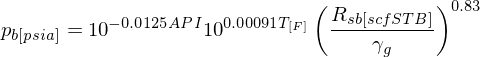

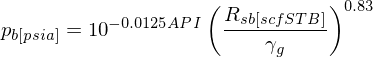

In [3]:
# определение алгоритма расчета в американских промысловых единицах

eq2 = Eq(p_bpsia,  (rsb_scfSTB/gamma_g)**0.83*(10**(0.00091*T_F))/(10**(0.0125*API)))
eq22 = Eq(p_bpsia,  (rsb_scfSTB/gamma_g)**0.83/(10**(0.0125*API)))
# покажем выражения в печатном виде
display(eq2)
display(eq22)

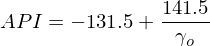

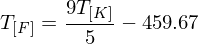

In [23]:
# выражения для преобразования единиц измерения из американских промысловых в практические метрические
scfSTB_to_m3m3 = rsb_m3m3/0.178107606679035
API_to_gamma_o = 141.5/gamma_o-131.5
F_to_K = T_K*9/5-459.67
psi_to_MPa = p_bMPaa * 14.6959 * 9.8692316931427
# покажем выражения в печатном виде
display(Eq(rsb_scfSTB , scfSTB_to_m3m3))
display(Eq(API,API_to_gamma_o))
display(Eq(T_F,F_to_K))
display(Eq(p_bpsia,psi_to_MPa))

In [24]:
eq3 = eq2.subs(rsb_scfSTB,scfSTB_to_m3m3).subs(API,API_to_gamma_o).subs(T_F,F_to_K).subs(p_bpsia,psi_to_MPa)

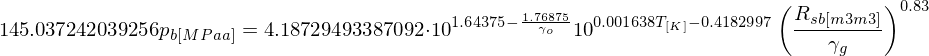

In [25]:
eq3

# Давление насыщения нефти газом, корреляция Стендинга
<a id="Pb_Standing"></a>

Корреляция Стендинга для оценки давления насыщения нефти газом. 

$$ P_b =  0.5197  \left( \frac{R_{sb}}{\gamma_g}\right)^{0.83} 10 ^{y_g} $$

где

$P_b$ давление насыщения, $МПа$ 

$R_{sb}$ газосодержание при давлении насыщения, $м^3/м^3 $

$\gamma_g$ относительная плотность газа, безразмерная величина  

$y_g$ мольная доля газа, $ y_g = 1.225 +0.00164 T - \frac{ 1.769}{\gamma_o}$

$\gamma_o$ относительная плотность нефти, безразмерная величина  

$ T $ - температура, $ ^{\circ}\mathrm{K}$ 

Корреляции Standing базируются на 105 экспериментально определенных давлениях насыщения нефтяных систем Калифорнии. Диапазоны значений основных свойств, использованных для разработки данной корреляции, приведены в таблице ниже. 

| <p align="left"> Параметр  | Диапазон |
| :--- | :--- |
| <p align="left"> давление насыщения,$P_b$ , $ МПа $  | 0.896…48.263  |
| <p align="left"> температура, $^{\circ}\mathrm{K} $ | 310…400 |
| <p align="left"> газосодержание при давлении насыщения, $R_{sb}$ , $м^3/м^3 $ | 3.6…254 |
| <p align="left"> относительная плотность нефти по воде, $\gamma_o$ | 0.725…0.956  |
| <p align="left"> относительная плотность газа, $\gamma_g$  | 0.59…0.95  |


 
 


ref "A Pressure-Volume-Temperature Correlation for Mixtures of California Oil and Gases", M.B. Standing, Drill. & Prod. Prac., API, 1947.

---

In [14]:
# Корреляция Стендинга для давления насыщения реализована 
# в виде функции unf_pb_Standing_MPaa в модуле PVT_correlations. 
# Подробные данные по функции включая исходный код приведены ниже

PVT.unf_pb_Standing_MPaa??

Signature: PVT.unf_pb_Standing_MPaa(rsb_m3m3, gamma_oil=0.86, gamma_gas=0.6, t_K=350)
Source:   
def unf_pb_Standing_MPaa(rsb_m3m3, gamma_oil=0.86, gamma_gas=0.6, t_K=350):
    """
    bubble point pressure calculation according to Standing (1947) correlation

    ref1 "A Pressure-Volume-Temperature Correlation for Mixtures of California Oil and Gases",
    M.B. Standing, Drill. & Prod. Prac., API, 1947.

    ref2  "Стандарт компании Юкос. Физические свойства нефти. Методы расчета." Афанасьев В.Ю., Хасанов М.М. и др. 2002 г

    return bubble point pressure abs in MPa
    rsb_m3m3,       solution ration at bubble point, must be given, m3/m3
    gamma_oil=0.86, specific gas density (by water)
    gamma_gas=0.6,  specific gas density (by air)
    t_K=350         temperature, K
    """
    min_rsb = 1.8
    rsb_old = rsb_m3m3
    if rsb_m3m3 < min_rsb:
        rsb_m3m3 = min_rsb
    # мольная доля газа
    yg = 1.225 + 0.001648 * t_K - 1.769 / gamma_oil
    pb_MPaa = 0.5197 * (rsb_m3m3 / 

в приведеном коде использована коррекция значений давления насыщения при низких значениях газосодержания при давлении насыщения для обеспечения выхода на значение $P_b = 1$ при $R{sb} = 0$

<img  src="pics/Pb-Standing_comparison.png" width="600"  >

---
Построим пару графиков, используя приведенную функцию

In [3]:
# параметры определяющие дипазоны значений для построения графиков
rsb_set=np.arange(1,300,10)
t_set=np.arange(273,380,30)
t_set_def=np.array([313])
gg_set=np.arange(0.6,1,0.1)
gg_set_def=np.array([0.8])
go_set=np.arange(0.8,1,0.05)
go_set_def=np.array([0.86])
# функция для автоматизации построения графиков по давлению насыщения
def prep_plot(func,tset,goset,ggset,plot_title,plot_xlab,plot_ylab):
    for t in tset:
        for gg in ggset:
            for go in goset:
                pb_set=[]
                for rsb in rsb_set:
                    pb_set.append(func(rsb,t_K = t,gamma_gas = gg,gamma_oil = go))
                plt.plot(rsb_set, pb_set, label='t = %1.0f $ ^{\circ}\mathrm{K}$'%t +
                                                 ' $\gamma_g$ = %1.2f'%gg + 
                                                 ' $\gamma_o$ = %1.2f'%go)
    plt.title(plot_title)
    plt.ylabel(plot_ylab, color = 'black')
    plt.xlabel(plot_xlab, color = 'black')
    plt.legend()


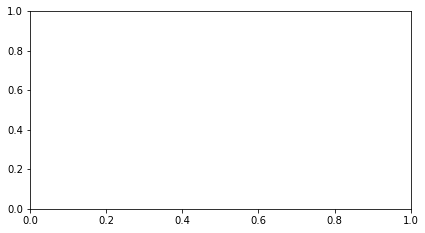

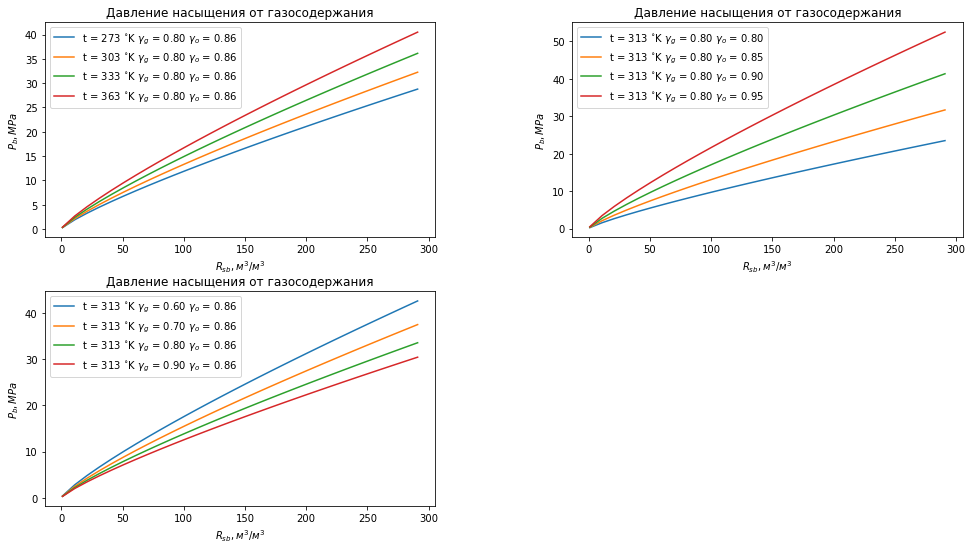

In [4]:
# код для построения графиков
plt.figure(figsize=(15,8))
f = PVT.unf_pb_Standing_MPaa
# рисуем первый график
plt.subplot(221)
prep_plot(f,t_set,go_set_def,gg_set_def,
              'Давление насыщения от газосодержания',
               '$R_{sb}, м^3/м^3$',
               '$P_b, MPa$')
# рисуем второй график
plt.subplot(222)
prep_plot(f,t_set_def,go_set,gg_set_def,
              'Давление насыщения от газосодержания',
               '$R_{sb}, м^3/м^3$',
               '$P_b, MPa$')
# рисуем третий график
plt.subplot(223)
prep_plot(f,t_set_def,go_set_def,gg_set,
              'Давление насыщения от газосодержания',
               '$R_{sb}, м^3/м^3$',
               '$P_b, MPa$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
# рисуем все
plt.show()


## Давление насыщения нефти газом
<a id="Pb"></a>

### Давление насыщения, корреляция Стендинга
<a id="Pb_Standing"></a>

Корреляция Стендинга для оценки давления насыщения нефти газом. 

$$ P_b =  0.5197  \left( \frac{R_{sb}}{\gamma_g}\right)^{0.83} 10 ^{y_g} $$

где

$P_b$ давление насыщения, $МПа$ 

$R_{sb}$ газосодержание при давлении насыщения, $м^3/м^3 $

$\gamma_g$ относительная плотность газа, безразмерная величина  

$y_g$ мольная доля газа, $ y_g = 1.225 +0.00164 T - \frac{ 1.769}{\gamma_o}$

$\gamma_o$ относительная плотность нефти, безразмерная величина  

$ T $ - температура, $ ^{\circ}\mathrm{K}$

Корреляции Standing базируются на 105 экспериментально определенных давлениях насыщения нефтяных систем Калифорнии. Диапазоны значений основных свойств, использованных для разработки данной корреляции, приведены в таблице ниже. 

| <p align="left"> Параметр  | Диапазон |
| :--- | :--- |
| <p align="left"> давление насыщения,$P_b$ , $ МПа $  | 0.896…48.263  |
| <p align="left"> температура, $^{\circ}\mathrm{K} $ | 310…400 |
| <p align="left"> газосодержание при давлении насыщения, $R_{sb}$ , $м^3/м^3 $ | 3.6…254 |
| <p align="left"> относительная плотность нефти по воде, $\gamma_o$ | 0.725…0.956  |
| <p align="left"> относительная плотность газа, $\gamma_g$  | 0.59…0.95  |


 
 


ref "A Pressure-Volume-Temperature Correlation for Mixtures of California Oil and Gases", M.B. Standing, Drill. & Prod. Prac., API, 1947.

---